In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
import ISLP
from ISLP.models import (ModelSpec as MS, summarize, poly)

In [3]:
boston = ISLP.load_data('Boston')
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


In [4]:
X = pd.DataFrame({'intercept':np.ones(boston.shape[0]), 'lstat':boston['lstat']})
y = boston['medv']
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Tue, 28 Jan 2025   Prob (F-statistic):           5.08e-88
Time:                        11:27:52   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
design = MS(['lstat'])
dir(design)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_feature_names',
 '_check_n_features',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sklearn_auto_wrap_output_keys',
 '_validate_data',
 '_validate_params',
 'build_sequence',
 'build_submodel',
 'categorical_encoders',
 'categorical_encoders_',
 'categorical_features',
 'fit',
 'fit_transform',
 'get_params',
 'intercept',
 'names',
 'set_output',
 'set_params',
 'terms',
 'transform']

In [8]:
design_fit = design.fit(boston)
design_fit

ModelSpec(terms=['lstat'])

In [9]:
X = design.transform(boston)
X

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94
4,1.0,5.33
...,...,...
501,1.0,9.67
502,1.0,9.08
503,1.0,5.64
504,1.0,6.48


In [10]:
design = MS(['lstat'])
X = design.fit_transform(boston)
X

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94
4,1.0,5.33
...,...,...
501,1.0,9.67
502,1.0,9.08
503,1.0,5.64
504,1.0,6.48


In [12]:
results.params

intercept    34.553841
lstat        -0.950049
dtype: float64

In [14]:
new_df = pd.DataFrame({'lstat': [5, 10, 15, 20, 25, 30]})
newX = design.transform(new_df)
newX

,intercept,lstat
0,1.0,5
1,1.0,10
2,1.0,15
3,1.0,20
4,1.0,25
5,1.0,30


In [18]:
new_pred = results.get_prediction(newX)
new_pred.predicted_mean, new_pred.conf_int(alpha=0.05), new_pred.conf_int(obs=True, alpha=0.05)

(array([29.80359411, 25.05334734, 20.30310057, 15.5528538 , 10.80260704,
         6.05236027]),
 array([[29.00741194, 30.59977628],
        [24.47413202, 25.63256267],
        [19.73158815, 20.87461299],
        [14.77355013, 16.33215748],
        [ 9.71745557, 11.8877585 ],
        [ 4.62500435,  7.47971618]]),
 array([[17.56567478, 42.04151344],
        [12.82762635, 37.27906833],
        [ 8.0777421 , 32.52845905],
        [ 3.31602098, 27.78968663],
        [-1.45750378, 23.06271785],
        [-6.24276512, 18.34748566]]))

In [19]:
def abline(ax, b, m, *args, **kwargs):
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)

<AxesSubplot:xlabel='lstat', ylabel='medv'>

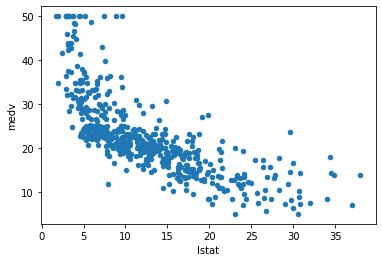

In [20]:
ax = boston.plot.scatter('lstat', 'medv')
ax

In [21]:
abline(ax, results.params[0], results.params[1], 'r--', linewidth=3)

C:\Users\admin\AppData\Local\Temp\ipykernel_18348\2431627862.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abline(ax, results.params[0], results.params[1], 'r--', linewidth=3)


In [30]:
ax.axline((0, results.params[0]), slope=results.params[1])

C:\Users\admin\AppData\Local\Temp\ipykernel_18348\3041638864.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.axline((0, results.params[0]), slope=results.params[1])


In [33]:
results.get_influence().hat_matrix_diag, np.argmax(results.get_influence().hat_matrix_diag)

(array([0.00426252, 0.00245553, 0.00486368, 0.00563978, 0.00405871,
        0.00412751, 0.00197822, 0.00361537, 0.01356717, 0.00274419,
        0.00433693, 0.00199106, 0.00233916, 0.00272569, 0.00219866,
        0.00265576, 0.00340847, 0.00213425, 0.0020123 , 0.00204949,
        0.0046947 , 0.00203007, 0.00340558, 0.00400439, 0.00249275,
        0.00255394, 0.00215694, 0.00280761, 0.00197712, 0.00199388,
        0.00581832, 0.0019821 , 0.0107798 , 0.00323656, 0.00427079,
        0.00231952, 0.00203629, 0.00256179, 0.00222348, 0.00467273,
        0.00639974, 0.00434671, 0.00379466, 0.00303157, 0.00235019,
        0.00220805, 0.0020633 , 0.00344352, 0.014778  , 0.00246481,
        0.00200095, 0.00237967, 0.00408724, 0.00266881, 0.00215527,
        0.00436495, 0.00381598, 0.0049175 , 0.00327945, 0.00243395,
        0.00198587, 0.00210028, 0.00333859, 0.00236234, 0.00279905,
        0.00445098, 0.00220239, 0.00278127, 0.0019837 , 0.00255578,
        0.0033432 , 0.00227489, 0.00395205, 0.00

In [34]:
X = MS(['lstat', 'age']).fit_transform(boston)
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Tue, 28 Jan 2025   Prob (F-statistic):           2.98e-88
Time:                        12:39:23   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     33.2228      0.731     45.458      0.000      31.787      34.659
lstat         -1.0321      0.048    -21.416      0.000      -1.127      -0.937
age            0.0345      0.012      2.826      0.005       0.011       0.059
==============================================================================
Omnibus:                      124.288   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.026
Skew:                           1.362   Prob(JB):                     1.02e-53
Kurtosis:                       5.038   Cond. No.                         201.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
terms = boston.columns.drop('medv')
X = MS(terms).fit_transform(boston)
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     113.5
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          2.23e-133
Time:                        12:40:59   Log-Likelihood:                -1504.9
No. Observations:                 506   AIC:                             3036.
Df Residuals:                     493   BIC:                             3091.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     41.6173      4.936      8.431      0.000      31.919      51.316
crim          -0.1214      0.033     -3.678      0.000      -0.186      -0.057
zn             0.0470      0.014      3.384      0.001       0.020       0.074
indus          0.0135      0.062      0.217      0.829      -0.109       0.136
chas           2.8400      0.870      3.264      0.001       1.131       4.549
nox          -18.7580      3.851     -4.870      0.000     -26.325     -11.191
rm             3.6581      0.420      8.705      0.000       2.832       4.484
age            0.0036      0.013      0.271      0.787      -0.023       0.030
dis           -1.4908      0.202     -7.394      0.000      -1.887      -1.095
rad            0.2894      0.067      4.325      0.000       0.158       0.421
tax           -0.0127      0.004     -3.337      0.001      -0.020      -0.005
ptratio       -0.9375      0.132     -7.091      0.000      -1.197      -0.678
lstat         -0.5520      0.051    -10.897      0.000      -0.652      -0.452
==============================================================================
Omnibus:                      171.096   Durbin-Watson:                   1.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              709.937
Skew:                           1.477   Prob(JB):                    6.90e-155
Kurtosis:                       7.995   Cond. No.                     1.17e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
results.rsquared, np.sqrt(results.scale)

(0.7343070437613076, 4.798034335596367)

In [41]:
vals = [VIF(X, i) for i in range(1, X.shape[1])]
vif = pd.DataFrame({'vif':vals}, index=X.columns[1:])
vif

,vif
crim,1.767486
zn,2.298459
indus,3.987181
chas,1.071168
nox,4.369093
rm,1.912532
age,3.088232
dis,3.954037
rad,7.445301
tax,9.002158


In [44]:
X = MS(['lstat', 'age', ('lstat', 'age')]).fit_transform(boston)
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Tue, 28 Jan 2025   Prob (F-statistic):           4.86e-88
Time:                        12:49:25   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     36.0885      1.470     24.553      0.000      33.201      38.976
lstat         -1.3921      0.167     -8.313      0.000      -1.721      -1.063
age           -0.0007      0.020     -0.036      0.971      -0.040       0.038
lstat:age      0.0042      0.002      2.244      0.025       0.001       0.008
==============================================================================
Omnibus:                      135.601   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.955
Skew:                           1.417   Prob(JB):                     3.29e-65
Kurtosis:                       5.461   Cond. No.                     6.88e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
X = MS([poly('lstat', degree=2), 'age']).fit_transform(boston)
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     337.3
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          7.03e-120
Time:                        13:14:21   Log-Likelihood:                -1561.0
No. Observations:                 506   AIC:                             3130.
Df Residuals:                     502   BIC:                             3147.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
intercept                   17.7151      0.781     22.681      0.000      16.181      19.250
poly(lstat, degree=2)[0]  -179.2279      6.733    -26.620      0.000    -192.456    -166.000
poly(lstat, degree=2)[1]    72.9908      5.482     13.315      0.000      62.220      83.761
age                          0.0703      0.011      6.471      0.000       0.049       0.092
==============================================================================
Omnibus:                       81.499   Durbin-Watson:                   1.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              155.528
Skew:                           0.918   Prob(JB):                     1.69e-34
Kurtosis:                       5.001   Cond. No.                     2.16e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
results.fittedvalues, results.resid

(0      33.708731
 1      26.394812
 2      35.550975
 3      37.030349
 4      32.173607
          ...    
 501    24.774887
 502    26.347450
 503    34.093894
 504    32.220124
 505    28.854260
 Length: 506, dtype: float64,
 0      -9.708731
 1      -4.794812
 2      -0.850975
 3      -3.630349
 4       4.026393
          ...    
 501    -2.374887
 502    -5.747450
 503   -10.193894
 504   -10.220124
 505   -16.954260
 Length: 506, dtype: float64)

In [48]:
carseats = ISLP.load_data('Carseats')
carseats

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [49]:
y = carseats['Sales']
vars = list(carseats.columns.drop('Sales')) + [('Income', 'Advertising'), ('Price', 'Age')]
X = MS(vars).fit_transform(carseats)
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     210.0
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          6.14e-166
Time:                        13:23:23   Log-Likelihood:                -564.67
No. Observations:                 400   AIC:                             1157.
Df Residuals:                     386   BIC:                             1213.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercept              6.5756      1.009      6.519      0.000       4.592       8.559
CompPrice              0.0929      0.004     22.567      0.000       0.085       0.101
Income                 0.0109      0.003      4.183      0.000       0.006       0.016
Advertising            0.0702      0.023      3.107      0.002       0.026       0.115
Population             0.0002      0.000      0.433      0.665      -0.001       0.001
Price                 -0.1008      0.007    -13.549      0.000      -0.115      -0.086
ShelveLoc[Good]        4.8487      0.153     31.724      0.000       4.548       5.149
ShelveLoc[Medium]      1.9533      0.126     15.531      0.000       1.706       2.201
Age                   -0.0579      0.016     -3.633      0.000      -0.089      -0.027
Education             -0.0209      0.020     -1.063      0.288      -0.059       0.018
Urban[Yes]             0.1402      0.112      1.247      0.213      -0.081       0.361
US[Yes]               -0.1576      0.149     -1.058      0.291      -0.450       0.135
Income:Advertising     0.0008      0.000      2.698      0.007       0.000       0.001
Price:Age              0.0001      0.000      0.801      0.424      -0.000       0.000
==============================================================================
Omnibus:                        1.281   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.527   Jarque-Bera (JB):                1.147
Skew:                           0.129   Prob(JB):                        0.564
Kurtosis:                       3.050   Cond. No.                     1.31e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""